<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [491]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [492]:
df=pd.read_csv("car_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [493]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [494]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [495]:
df["Year"]=df.Year.max()-df.Year

In [496]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [497]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


<AxesSubplot:>

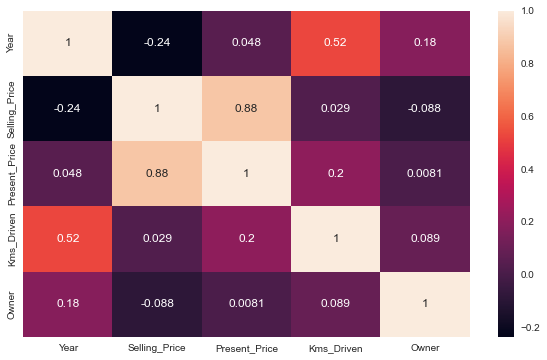

In [498]:
sns.heatmap(df.corr(),annot=True)

In [499]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [500]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [501]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [502]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [503]:
df_dm = pd.get_dummies(df)

In [504]:
df_dm.shape

(301, 110)

In [505]:
df_dm.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Name_800', 'Car_Name_Activa 3g', 'Car_Name_Activa 4g',
       'Car_Name_Bajaj  ct 100', 'Car_Name_Bajaj Avenger 150',
       ...
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object', length=110)

# Data Preparation

In [506]:
Y=df_dm["Selling_Price"]
X=df_dm.drop(["Selling_Price"],axis=1)


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

### Splitting data into training and testing

In [507]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [508]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler

scale=MinMaxScaler()
scale.fit(X_train)

MinMaxScaler()

In [509]:
X_train_scaled=scale.transform(X_train)
len(X_train_scaled)

210

In [510]:
X_test_scaled=scale.transform(X_test)
len(X_test_scaled)

91

##  Model Building (Linear Regression)

In [511]:
from sklearn.linear_model import LinearRegression 
LR_model=LinearRegression()
LR_model.fit(X_train_scaled,y_train)

LinearRegression()

# Interpret the model

In [512]:
y_pred=LR_model.predict(X_test_scaled)
y_train_pred=LR_model.predict(X_train_scaled)
y_pred

array([-1.26444349e+13,  9.90625000e+00,  5.65625000e+00, -6.56250000e-01,
        8.71875000e+00,  6.71875000e+00,  1.65625000e+00, -2.87801780e+13,
        8.43750000e-01,  6.78125000e+00,  3.63114304e+12,  5.93750000e-01,
        8.28125000e+00,  5.68769685e+13,  6.46875000e+00,  2.21875000e+00,
        2.90625000e+00,  1.13437500e+01, -9.04381436e+13, -2.71660582e+13,
        1.05592542e+14,  8.09375000e+00,  6.34375000e+00,  2.28125000e+00,
       -1.47438323e+14,  3.65625000e+00,  5.09375000e+00,  1.96875000e+00,
        2.96875000e+00,  2.71875000e+00, -3.12500000e-02,  8.96875000e+00,
       -2.09375000e+00,  2.09375000e+00,  8.28125000e+00,  4.15625000e+00,
        5.46875000e+00,  6.34375000e+00,  3.34375000e+00,  7.09375000e+00,
        5.59375000e+00,  5.98425052e+13,  4.15625000e+00, -2.81250000e-01,
        3.79634808e+12,  2.81250000e-01,  8.28125000e+00,  9.43750000e+00,
        3.78125000e+00,  4.28125000e+00,  6.09375000e+00,  3.09375000e+00,
        2.35625000e+01,  

# Model Evaluation

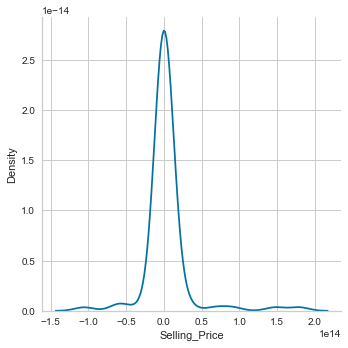

In [513]:
residuals = y_test-y_pred
sns.displot(residuals, kind="kde");

In [514]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #aralrında uçurum var overfit olduğunu tesbit ettim 
ls

,linear_train,linear_test
R2,0.953785,-3.376830e+25
mae,0.614804,9.207700e+12
mse,1.134233,9.615254e+26
rmse,1.065004,3.100847e+13


In [594]:
from sklearn.metrics import SCORERS    #içerisindeki tüm metricleri vaeriyor


In [516]:
from sklearn.model_selection import cross_validate, cross_val_score

In [517]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [518]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.015619,0.0,-2.861514e+23,-1.046333e+12,-1.173457e+25,-3.425576e+12
2,0.015624,0.0,-5.772289e+23,-1.550945e+12,-1.086947e+25,-3.296887e+12
3,0.015626,0.0,-5.755872e+22,-2.498379e+11,-6.918280e+23,-8.317620e+11
4,0.015622,0.0,-1.591531e+24,-2.287472e+12,-5.177029e+25,-7.195157e+12
5,0.015626,0.0,-8.588980e+22,-5.027278e+11,-1.524531e+24,-1.234719e+12


In [519]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean() #scorların ortalaması hala uçurum devam ediyor 

test_r2                            -5.196720e+23
test_neg_mean_absolute_error       -1.127463e+12
test_neg_mean_squared_error        -1.531814e+25
test_neg_root_mean_squared_error   -3.196820e+12
dtype: float64

In [520]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear") #aşırı overfit

,linear_train,linear_test
R2,0.953785,-3.376830e+25
mae,0.614804,9.207700e+12
mse,1.134233,9.615254e+26
rmse,1.065004,3.100847e+13


# Regularization

# Ridge

In [521]:
from sklearn.linear_model import Ridge

In [522]:
ridge_model = Ridge(alpha=1, random_state=42)

In [523]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [524]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [525]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.894160,0.869645
mae,0.938048,1.306398
mse,2.597600,3.711741
rmse,1.611707,1.926588


In [526]:
pd.concat([ls, rs], axis=1) #overfit azaltıldı

,linear_train,linear_test,ridge_train,ridge_test
R2,0.953785,-3.376830e+25,0.894160,0.869645
mae,0.614804,9.207700e+12,0.938048,1.306398
mse,1.134233,9.615254e+26,2.597600,3.711741
rmse,1.065004,3.100847e+13,1.611707,1.926588


# For Ridge Regression CV with alpha : 1

In [527]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [528]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.0,0.015625,0.527390,-2.141277,-19.380925,-4.402377
2,0.0,0.000000,0.870228,-1.051899,-2.443659,-1.563221
3,0.0,0.000000,0.871905,-0.920812,-1.539637,-1.240821
4,0.0,0.000000,0.754406,-1.504869,-7.988823,-2.826451
5,0.0,0.000000,0.858690,-1.208542,-2.508240,-1.583742


In [529]:
scores = pd.DataFrame(scores, index = range(1, 6)) #scorlar birbirine yakın bir sorun yok
scores.iloc[:,2:].mean()

test_r2                             0.776524
test_neg_mean_absolute_error       -1.365480
test_neg_mean_squared_error        -6.772257
test_neg_root_mean_squared_error   -2.323322
dtype: float64

In [530]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge") #rmse ödüllendirmede yapıyor

,ridge_train,ridge_test
R2,0.894160,0.869645
mae,0.938048,1.306398
mse,2.597600,3.711741
rmse,1.611707,1.926588


In [531]:
from sklearn.linear_model import RidgeCV

In [532]:
alpha_space = np.linspace(0.01, 1, 100)   #en iyi alpha modelini seçmeye lineer regrasyon overfitting
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [533]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [534]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [535]:
ridge_cv_model.alpha_ 

0.03

In [536]:
ridge_cv_model.best_score_

-2.118746107261812

In [537]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [538]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.949462,0.856809
mae,0.591668,1.319021
mse,1.240329,4.077242
rmse,1.113700,2.019218


In [539]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.953785,-3.376830e+25,0.894160,0.869645,0.949462,0.856809
mae,0.614804,9.207700e+12,0.938048,1.306398,0.591668,1.319021
mse,1.134233,9.615254e+26,2.597600,3.711741,1.240329,4.077242
rmse,1.065004,3.100847e+13,1.611707,1.926588,1.113700,2.019218


# Lasso

In [540]:
from sklearn.linear_model import Lasso, LassoCV

In [541]:
lasso_model = Lasso(alpha=1, random_state=42)  #modeli sıfırlıyoruz parametreler aynı olmalı alınan scorlar bizi yanıltmasın diye
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [542]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [543]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") #model lasso ile underfit kalmış ridge ve lasso dada 
lss

,lasso_train,lasso_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


In [544]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.953785,-3.376830e+25,0.894160,0.869645,0.949462,0.856809,0.126310,0.121726
mae,0.614804,9.207700e+12,0.938048,1.306398,0.591668,1.319021,2.964977,3.372374
mse,1.134233,9.615254e+26,2.597600,3.711741,1.240329,4.077242,21.442652,25.008152
rmse,1.065004,3.100847e+13,1.611707,1.926588,1.113700,2.019218,4.630621,5.000815


# For Lasso CV with Default Alpha : 1

In [545]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [546]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001997,0.002000,0.059427,-3.791034,-38.571288,-6.210579
2,0.002782,0.001004,0.140922,-3.020915,-16.176800,-4.022039
3,0.003000,0.000996,0.249191,-2.116144,-9.024363,-3.004058
4,0.001999,0.001998,0.058324,-3.251211,-30.631407,-5.534565
5,0.001999,0.000999,0.177001,-2.908517,-14.608111,-3.822056


In [547]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.136973
test_neg_mean_absolute_error        -3.017564
test_neg_mean_squared_error        -21.802394
test_neg_root_mean_squared_error    -4.518659
dtype: float64

In [548]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")  #terrible :) 

,lasso_train,lasso_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


In [549]:
lasso_model.coef_  #elimizde 2 feature kalmış gidip müşteriye sormalıyız minimum feature ile max score elde etmek istermisin 
#%10 luk bir kayıp senin işini görürmü

array([-0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [550]:
len([i for i in lasso_model.coef_ if i!=0])

2

# Choosing best alpha value with Cross-Validation

In [551]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [552]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [553]:
lasso_cv_model.alpha_  

0.01

In [554]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [555]:
lasso_cv_model.mse_path_[-1].mean()

3.1194073876709796

In [556]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [557]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")#0.01 alpha değeri ile dahada scorların iyileştiğini görebiliyoruz
lcs

,lasso_cv_train,lasso_cv_test
R2,0.919095,0.901471
mae,0.919019,1.148304
mse,1.985629,2.805545
rmse,1.409124,1.674976


In [558]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.953785,-3.376830e+25,0.894160,0.869645,0.949462,0.856809,0.126310,0.121726,0.919095,0.901471
mae,0.614804,9.207700e+12,0.938048,1.306398,0.591668,1.319021,2.964977,3.372374,0.919019,1.148304
mse,1.134233,9.615254e+26,2.597600,3.711741,1.240329,4.077242,21.442652,25.008152,1.985629,2.805545
rmse,1.065004,3.100847e+13,1.611707,1.926588,1.113700,2.019218,4.630621,5.000815,1.409124,1.674976


In [559]:
lasso_cv_model.coef_

array([-5.60561626e+00,  3.38405239e+01, -3.47386646e-02, -0.00000000e+00,
        1.40345899e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  6.58821131e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.08432622e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.07577165e+00,  0.00000000e+00, -1.25120071e+00,
       -3.92247606e-01,  1.91167942e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [560]:
len([i for i in lasso_cv_model.coef_ if i!=0])

28

## Elastic-Net 

In [561]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [562]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)  

ElasticNet(alpha=1, random_state=42)

In [563]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [564]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.224736,0.212087
mae,2.776190,3.124668
mse,19.027030,22.435194
rmse,4.361998,4.736580


In [565]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.953785,-3.376830e+25,0.894160,0.869645,0.949462,0.856809,0.126310,0.121726,0.919095,0.901471,0.224736,0.212087
mae,0.614804,9.207700e+12,0.938048,1.306398,0.591668,1.319021,2.964977,3.372374,0.919019,1.148304,2.776190,3.124668
mse,1.134233,9.615254e+26,2.597600,3.711741,1.240329,4.077242,21.442652,25.008152,1.985629,2.805545,19.027030,22.435194
rmse,1.065004,3.100847e+13,1.611707,1.926588,1.113700,2.019218,4.630621,5.000815,1.409124,1.674976,4.361998,4.736580


In [566]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [567]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.154892,-3.526230,-34.656416,-5.886970
2,0.270436,-2.751663,-13.737996,-3.706480
3,0.322548,-2.026848,-8.142646,-2.853532
4,0.134234,-3.119878,-28.162153,-5.306803
5,0.331688,-2.620521,-11.862438,-3.444189


In [568]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.242760
test_neg_mean_absolute_error        -2.809028
test_neg_mean_squared_error        -19.312330
test_neg_root_mean_squared_error    -4.239595
dtype: float64

In [569]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic") #shock :) 

,elastic_train,elastic_test
R2,0.224736,0.212087
mae,2.776190,3.124668
mse,19.027030,22.435194
rmse,4.361998,4.736580


In [570]:
elastic_model.coef_ 

array([-0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [571]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42) #l1_ratio 0 ile 1 arasında değişiyor 

In [572]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [573]:
elastic_cv_model.alpha_

0.01

In [574]:
elastic_cv_model.l1_ratio_

1.0

In [575]:
elastic_cv_model.mse_path_[5][-1].mean()

3.1194073876709796

In [576]:
y_pred = elastic_cv_model.predict(X_test_scaled)  #ikisininde predictionunu aldık
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [577]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.919095,0.901471
mae,0.919019,1.148304
mse,1.985629,2.805545
rmse,1.409124,1.674976


In [578]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.953785,-3.376830e+25,0.894160,0.869645,0.949462,0.856809,0.126310,0.121726,0.919095,0.901471,0.224736,0.212087,0.919095,0.901471
mae,0.614804,9.207700e+12,0.938048,1.306398,0.591668,1.319021,2.964977,3.372374,0.919019,1.148304,2.776190,3.124668,0.919019,1.148304
mse,1.134233,9.615254e+26,2.597600,3.711741,1.240329,4.077242,21.442652,25.008152,1.985629,2.805545,19.027030,22.435194,1.985629,2.805545
rmse,1.065004,3.100847e+13,1.611707,1.926588,1.113700,2.019218,4.630621,5.000815,1.409124,1.674976,4.361998,4.736580,1.409124,1.674976


In [579]:
elastic_cv_model.coef_

array([-5.60561626e+00,  3.38405239e+01, -3.47386646e-02, -0.00000000e+00,
        1.40345899e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  6.58821131e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.08432622e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.07577165e+00,  0.00000000e+00, -1.25120071e+00,
       -3.92247606e-01,  1.91167942e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [580]:
len([i for i in elastic_cv_model.coef_ if i!=0])

28

# Grid Search

In [581]:
from sklearn.model_selection import GridSearchCV

In [582]:
elastic_model=ElasticNet(max_iter=10000,random_state=42)

In [583]:
param_grid={"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [584]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [585]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=1, l1_ratio=1; total time=   0.0s


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [586]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [587]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003124,6.248760e-03,0.000000,0.000000,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-4.493313,-1.627856,-1.327455,-3.002784,-1.579139,-2.406110,1.197121,13
1,0.003125,6.249714e-03,0.000000,0.000000,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-4.372141,-1.522007,-1.213250,-2.859716,-1.560252,-2.305473,1.178170,11
2,0.006250,7.654247e-03,0.000000,0.000000,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-4.204760,-1.466003,-1.151153,-2.749692,-1.557252,-2.225772,1.128704,9
3,0.003125,6.250572e-03,0.000000,0.000000,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-3.590037,-1.428258,-1.073327,-2.580167,-1.548932,-2.044144,0.921319,7
4,0.003926,1.855087e-03,0.000599,0.000489,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-3.048319,-1.469798,-1.034501,-2.501477,-1.509784,-1.912776,0.743778,5
5,0.000599,1.198959e-03,0.000000,0.000000,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.203785,-1.490865,-1.017724,-2.453246,-1.492599,-1.731644,0.523149,3
6,0.003125,6.250858e-03,0.000000,0.000000,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.028024,-1.497596,-1.016673,-2.445475,-1.489979,-1.695549,0.493000,1
7,0.007946,6.992435e-03,0.000200,0.000400,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-4.533149,-1.671873,-1.376158,-3.084735,-1.582439,-2.449671,1.204465,14
8,0.004197,7.491953e-04,0.000799,0.000400,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-4.428745,-1.553110,-1.250098,-2.941671,-1.560675,-2.346860,1.194911,12
9,0.003597,4.895319e-04,0.000600,0.000490,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-4.283652,-1.483334,-1.165952,-2.825701,-1.557324,-2.263193,1.158364,10


In [588]:
grid_model.best_index_

6

In [589]:
grid_model.best_score_

-1.695549347220222

In [590]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [591]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.919095,0.901471
mae,0.919019,1.148304
mse,1.985629,2.805545
rmse,1.409124,1.674976


# Feature importances with Ridge

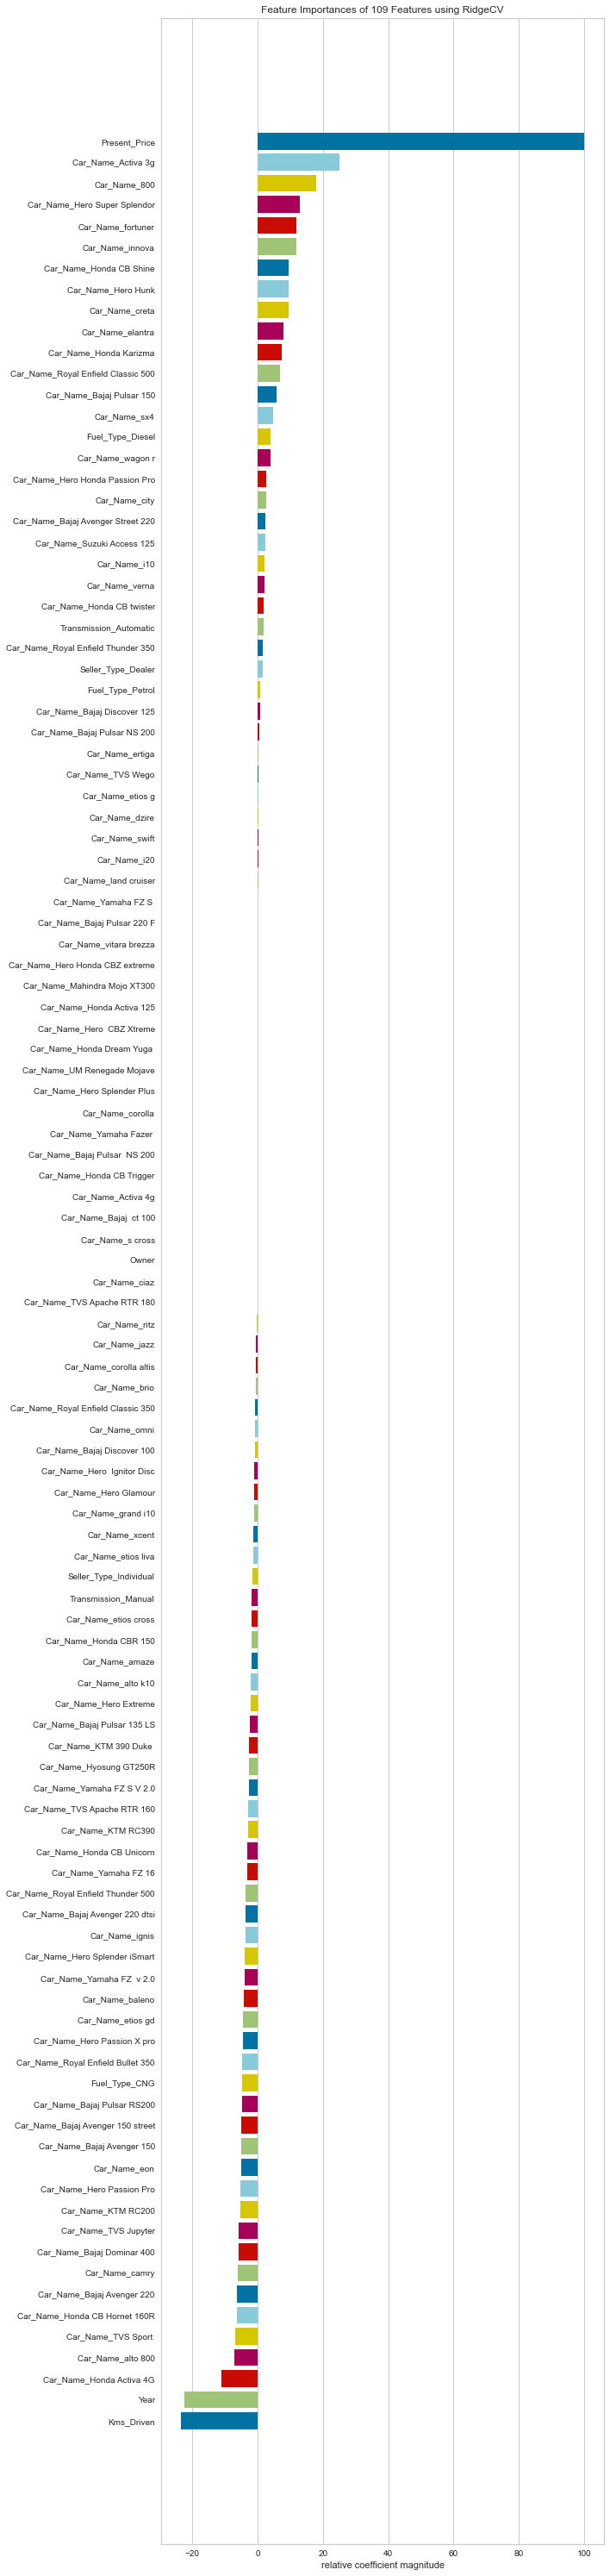

<AxesSubplot:title={'center':'Feature Importances of 109 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [592]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

# Feature importances with Lasso

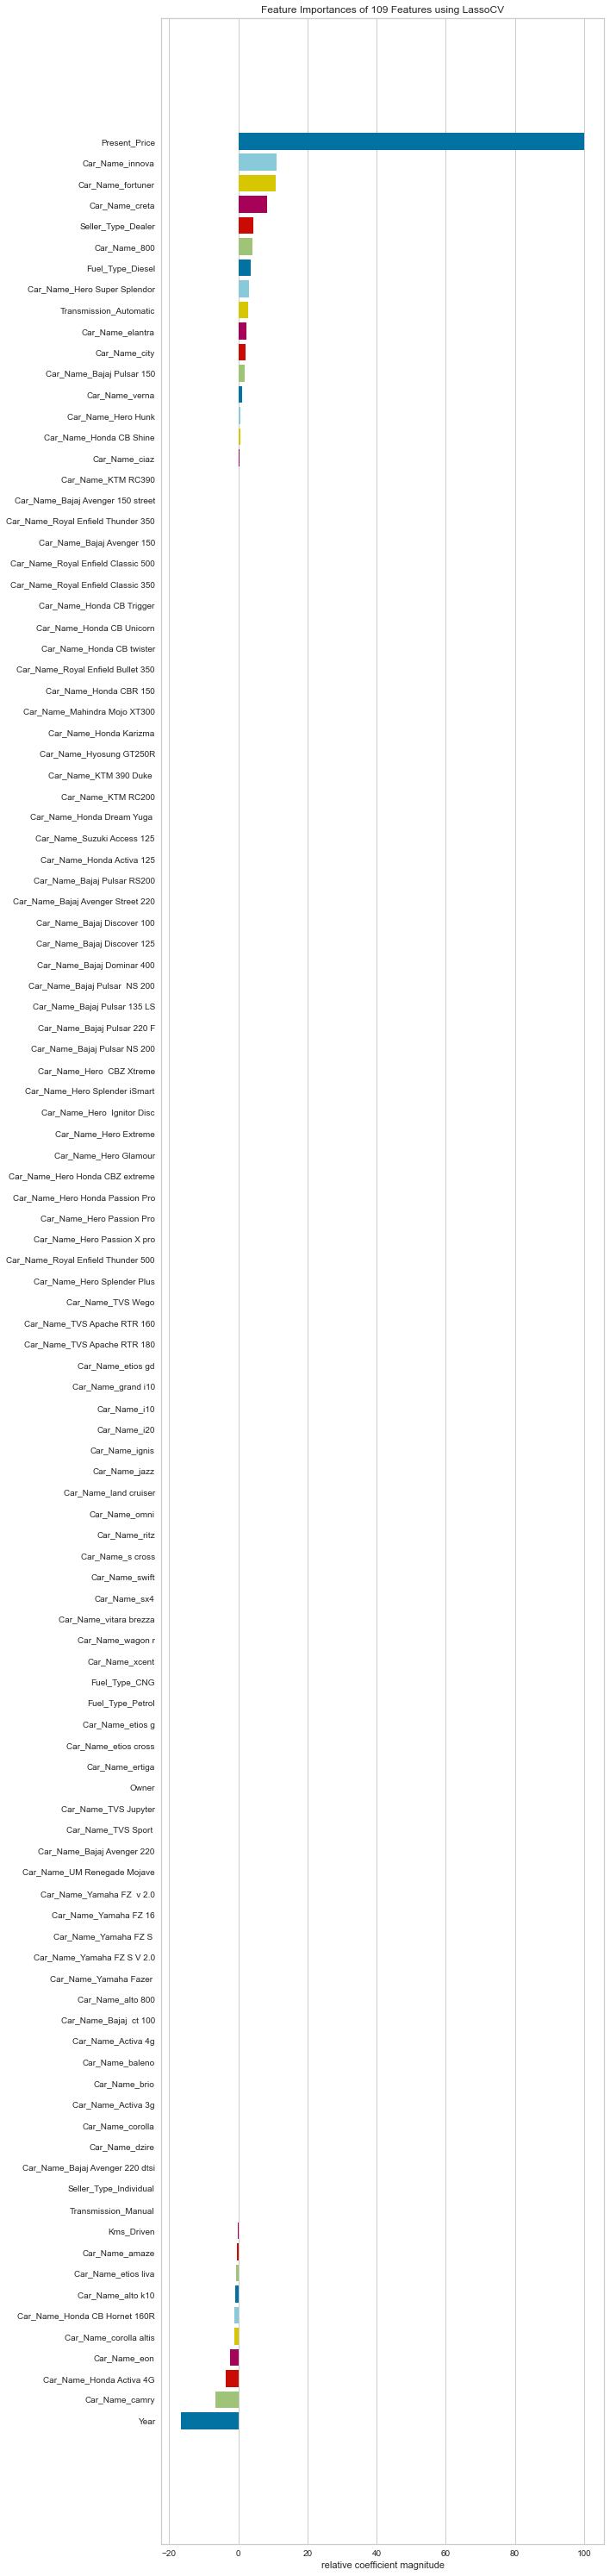

<AxesSubplot:title={'center':'Feature Importances of 109 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [593]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()